In [1]:
# Environment set up
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from env import host, user, password

def get_db_url(user,host,password,dbname):
    url = f'mysql+pymysql://{user}:{password}@{host}/dbname'
    return url

dbname = 'titanic_db'
url = get_db_url(user,host,password,dbname)

# Data Acquisition Codes

### Clipboard

In [2]:
# df_clipboard=pd.read_clipboard()

### Excel

In [3]:
# df_excel=pd.read_excel('file_name.xls')

### *.csv

In [4]:
# df_csv=pd.read_csv('file_name.csv')

### SQL

In [5]:
# read_sql(sql_query, connection_url)

### Google Sheet

In [6]:
sheet_id='1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g'
sheet_name='first_sheet_by_default'
google_sheet_url=f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [7]:
df_googlesheet = pd.read_csv(google_sheet_url)
df_googlesheet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,NaN,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S


In [8]:
# for native google urls
# csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

### AWS S3

In [9]:
df_s3 = pd.read_csv('https://s3.amazonaws.com/irs-form-990/index_2011.csv')
df_s3.head()

,RETURN_ID,FILING_TYPE,EIN,TAX_PERIOD,SUB_DATE,TAXPAYER_NAME,RETURN_TYPE,DLN,OBJECT_ID
0,9091250,EFILE,591971002,201009,11/30/2011 1:06:39 AM,ANGELUS INC,990,93493316003251,201103169349300325
1,9091274,EFILE,251713602,201106,11/30/2011 1:09:14 AM,TOUCH-STONE SOLUTIONS INC,990,93493313012311,201113139349301231
2,9091275,EFILE,232705170,201012,11/30/2011 1:09:16 AM,RONALD MCDONALD HOUSE CHARITIES- PHILADELPHIA ...,990,93493313013011,201113139349301301
3,9091276,EFILE,581805618,201106,11/30/2011 1:09:19 AM,TORRINGTON VOA ELDERLY HOUSING INC BELL PARK T...,990,93493313013111,201113139349301311
4,9091277,EFILE,581876019,201106,11/30/2011 1:09:21 AM,HOUSTON VOA INDEPENDENT HOUSING INC HEIGHTS MANOR,990,93493313013161,201113139349301316


### SQL

In [10]:
import env
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


### Data Caching Data in a Cache

In [11]:
df.to_csv('titanic.csv')

### Data Caching Workflow:

In [12]:
import os

def get_titanic_data():
    filename = "titanic.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_file(filename)

        # Return the dataframe to the calling code
        return df

## Exercises


4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [13]:
from pydataset import data
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [14]:
#iris from SNS

In [15]:
df_iris.shape

(150, 5)

In [16]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [17]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [18]:
stats=df_iris.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [19]:
stats['range'] = stats.max()-stats.min()
stats

,count,mean,std,min,25%,50%,75%,max,range
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,NaN
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,NaN
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,NaN
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,NaN



5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

### Make sure that the spreadsheet is publicly visible under your sharing settings.
- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [20]:
sheet_id='1p0E_0oLVJ3JeKNNarmlbtUFKPr71_ZO-Cvw5tpjV0LA'
sheet_name='Table1_CustDetails'
google_sheet_url=f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [21]:
df_cust = pd.read_csv(google_sheet_url)
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
 13  Unnamed: 13        0 non-null      float64
dtypes: float64(4), int64(4), object(6)
memory usage: 771.1+ KB


In [22]:
df_cust= df_cust.drop(columns = ['Unnamed: 13'])
df_excel_sample = df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [23]:
# Cleaning NA out of data
df_cust = df_cust.dropna()
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 769.8+ KB


In [24]:
# assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_excel_sample = df_cust.head(100)

In [25]:
# print the number of rows of your original dataframe
df_cust.shape

(7038, 13)

In [26]:
# assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_excel_sample.shape

(100, 13)

In [27]:
# print the first 5 column names
x=df_excel_sample.columns.to_list()
x[:5]

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [28]:
# print the column names that have a data type of object
list(df_excel_sample.select_dtypes('object'))


['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [29]:
# compute the range for each of the numeric variables.
y = df_excel_sample.select_dtypes('number')
y.max()-y.min()

is_senior_citizen       1.00
phone_service           2.00
internet_service        2.00
contract_type           2.00
monthly_charges        97.40
total_charges        8476.85
tenure                 73.20
dtype: float64

6. Read the data from [this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe, `df_google`

    - print the first 3 rows
    - print the number of rows and columns
    - print the column names
    - print the data type of each column
    - print the summary statistics for each of the numeric variables
    - print the unique values for each of your categorical variables

In [30]:
sheet_id='1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g'
sheet_name='train'
google_sheet_url=f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [31]:
df_google = pd.read_csv(google_sheet_url)
df_google.shape

(891, 12)

In [32]:
# print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,NaN,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,7.9250,NaN,S


In [33]:
# print the number of rows and columns
df_google.shape

(891, 12)

In [34]:
# print the column names
x=df_google.columns.to_list()
x

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [35]:
# print the data type of each column
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       661 non-null    float64
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [36]:
# print the summary statistics for each of the numeric variables
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,6.610000e+02,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,2.603185e+05,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,4.716093e+05,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,6.930000e+02,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,1.999600e+04,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,2.361710e+05,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,3.477430e+05,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,3.101298e+06,512.329200


In [37]:
# print the unique values for each of your categorical variables
df_google.select_dtypes('object').apply(lambda col: col.unique().tolist())

Name        [Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Florence Briggs Thayer), Heikkin...
Sex                                                                                    [male, female]
Cabin       [nan, C85, C123, E46, G6, C103, D56, A6, C23 C25 C27, B78, D33, B30, C52, B28, C83, F3...
Embarked                                                                               [S, C, Q, nan]
dtype: object

In [38]:
for col in df_google.columns:
    #print(col)
    

IndentationError: expected an indented block (1068157531.py, line 3)

In [39]:
df_google.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.



In [40]:
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [41]:
iris = acquire.get_iris_data()
iris.head()

Using cached csv


,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [42]:
# Drop the species_id and measurement_id columns.
iris2=iris.drop(['species_id'], axis=1)
iris2.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [43]:
# Rename the species_name column to just species.
iris3 = iris2.rename({'species_name':'species'}, axis=1)
iris3.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [44]:
dummy_iris = pd.get_dummies(iris3[['species']], dummy_na=False, drop_first=[True])
dummy_iris.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [45]:
# Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).
iris4 = pd.concat([iris3,dummy_iris], axis=1)
iris4.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [46]:
#Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.
def prep_iris():
    iris = acquire.get_iris_data()
    iris2 =iris.drop(['species_id'], axis=1)
    iris3 = iris2.rename({'species_name':'species'}, axis=1)
    dummy_iris = pd.get_dummies(iris3[['species']], dummy_na=False, drop_first=[True])
    iris4 = pd.concat([iris3,dummy_iris], axis=1)
    return iris4

In [47]:
prep_iris().head()

Using cached csv


,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [48]:
titanic = acquire.get_titanic_data()

Using cached csv


In [49]:
titanic.drop_duplicates()
titanic.drop_duplicates()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [50]:
titanic.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [51]:
# From lesson
def prep_titanic():
    '''
    This function will clean the data...
    '''
    titanic = acquire.get_titanic_data()
    titanic = titanic.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    titanic2 = titanic.drop(columns=cols_to_drop)
    titanic2['embark_town'] = titanic2.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(titanic2[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    titanic3 = pd.concat([titanic2, dummy_df], axis=1)
    print('Data cleaned for duplicates, columns dropped [deck, embarked, class, age], filled na, and added numerical versions of sex and embark')
    return titanic3

In [89]:
prep_titanic()

Using cached csv
Data cleaned for duplicates, columns dropped [deck, embarked, class, age], filled na, and added numerical versions of sex and embark


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


- Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.
2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.
3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.
4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [96]:
import acquire as acq
telco = acq.get_telco_data()
titanic = acq.get_titanic_data()
iris = acq.prep_iris_data()

Using cached csv
Using cached csv


AttributeError: module 'acquire' has no attribute 'prep_iris_data'

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.
2. Univariate Stats
- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
- Document takeaways & any actions.

3. Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.
- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
- Document takeaways & any actions.

4. Multivariate Stats
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col
- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).
- Document takeaways and any actions.

In [101]:
import prepare as pp
iris = prep_iris()

Using cached csv


In [102]:
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [103]:
# descriptive stats for all variables
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


In [106]:
# Split
train, test = train_test_split(iris, train_size=0.8, random_state=123, stratify=iris.species)
train, validate = train_test_split(train, train_size=0.7, random_state=123, stratify=train.species)

In [107]:
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             84 non-null     object 
 1   sepal_length        84 non-null     float64
 2   sepal_width         84 non-null     float64
 3   petal_length        84 non-null     float64
 4   petal_width         84 non-null     float64
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [111]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split

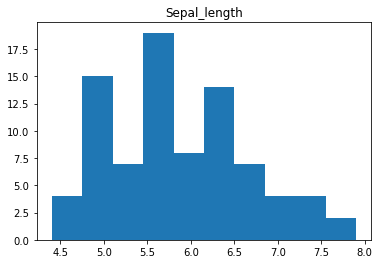

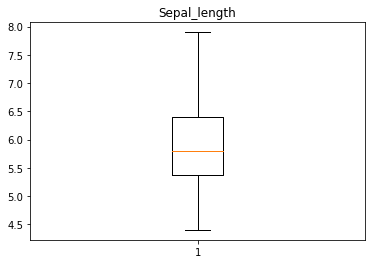

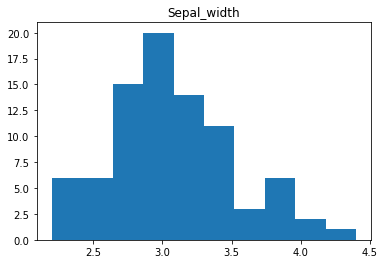

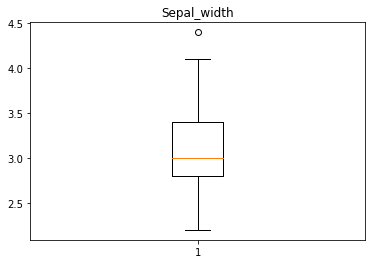

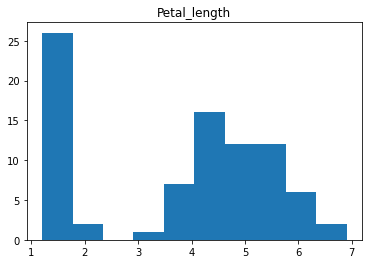

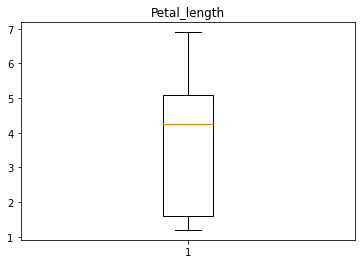

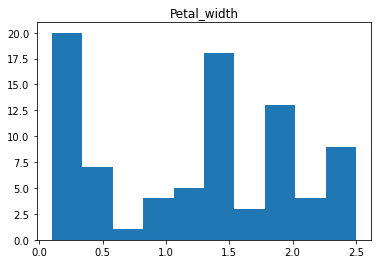

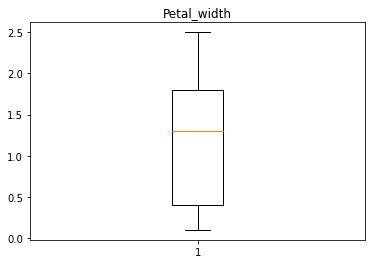

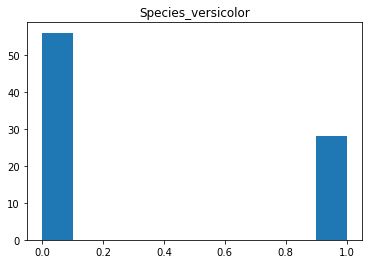

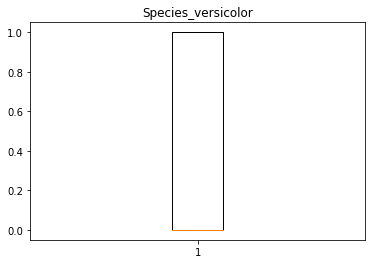

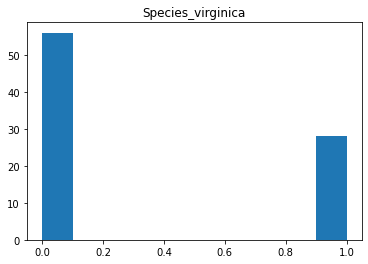

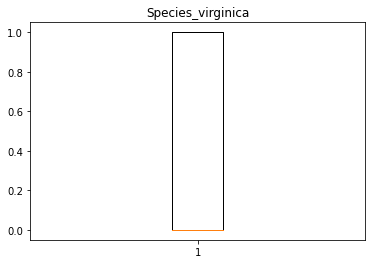

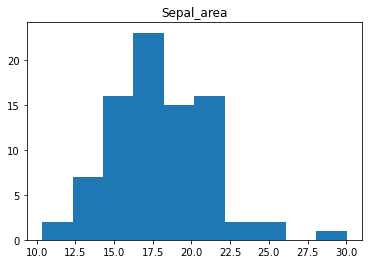

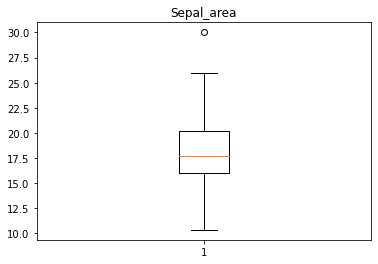

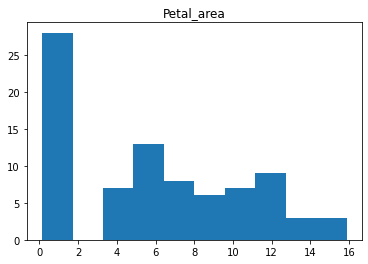

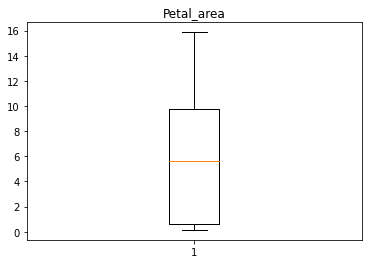

In [175]:
#For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()). 
#Plot numeric columns
# objects
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col.capitalize())
    plt.show()
    plt.boxplot(train[col])
    plt.title(col.capitalize())
    plt.show()

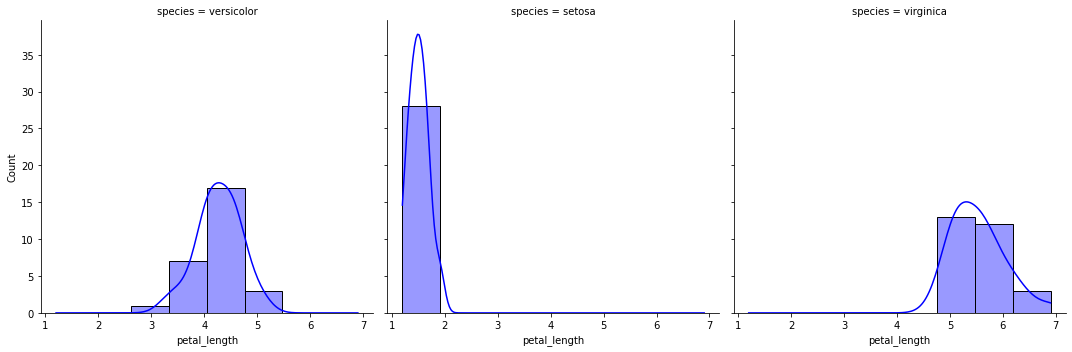

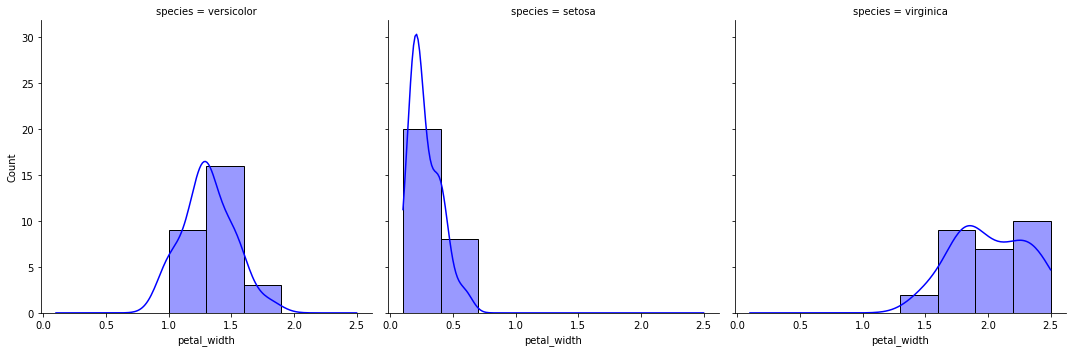

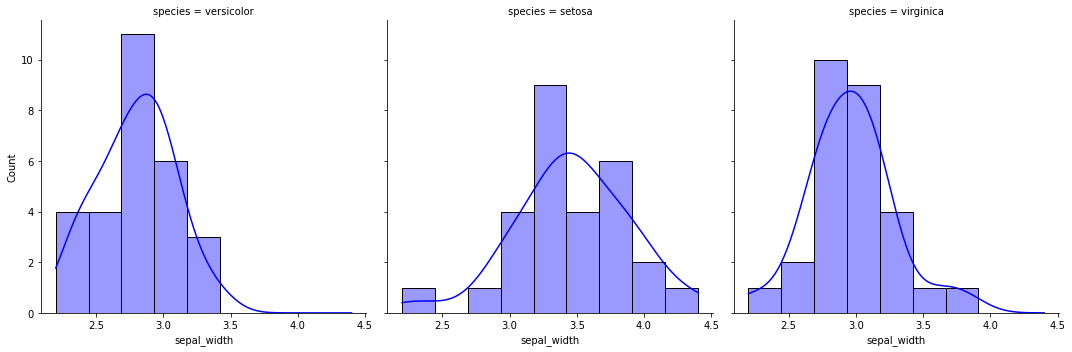

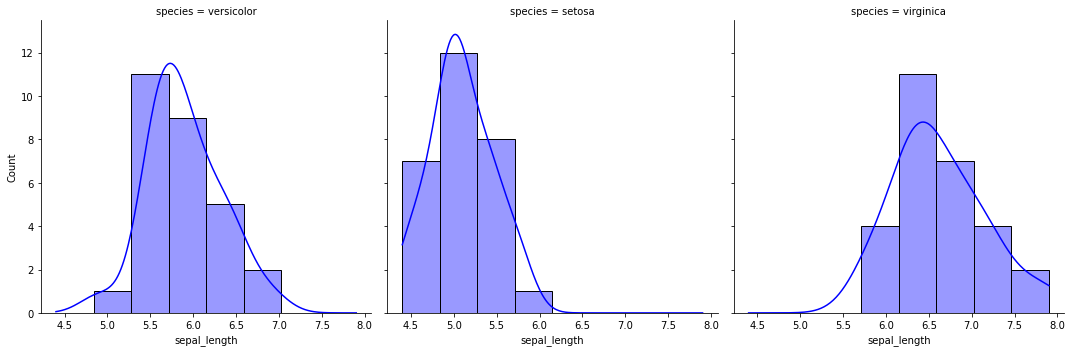

In [149]:
# Trying displot to see another version of visuals
sns.displot(data = train, x = 'petal_length', col = 'species', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'petal_width', col = 'species', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'sepal_width', col = 'species', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = train, x = 'sepal_length', col = 'species', kde = True, color = 'blue', alpha = 0.4)
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

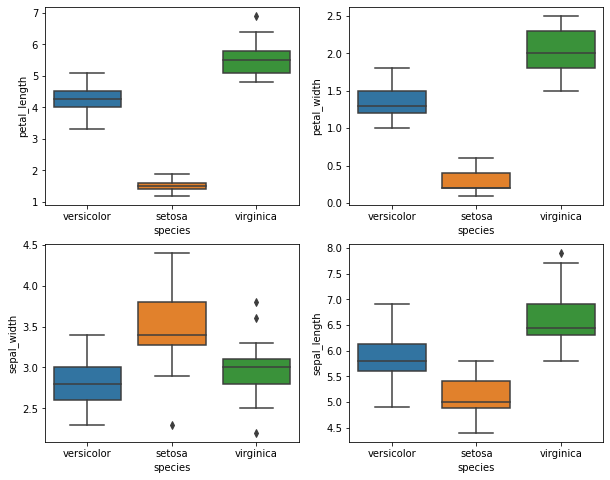

In [156]:
# Boxplot
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.boxplot(y = 'petal_length', x = 'species', data = train, ax=ax[0,0])
sns.boxplot(y = 'petal_width', x = 'species', data = train, ax=ax[0,1])
sns.boxplot(y = 'sepal_width', x = 'species', data = train, ax=ax[1,0])
sns.boxplot(y = 'sepal_length', x = 'species', data = train, ax=ax[1,1])

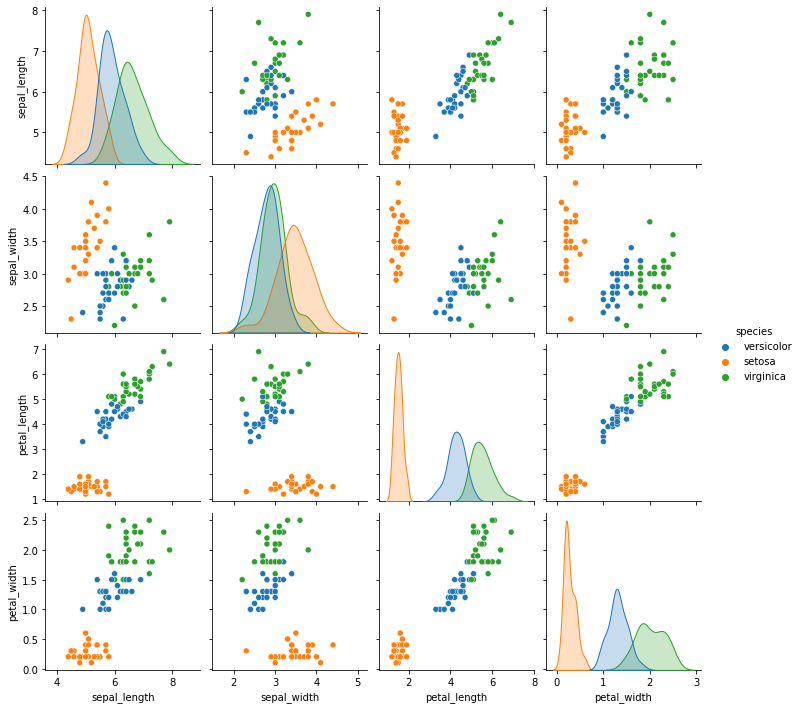

In [139]:
# Pairplot to see different species
sns.pairplot(train,vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='species')

In [117]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


## Iris initial takeaway

- petal length looks to have two distributions possible due to species



### Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.
- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
- Document takeaways & any actions.

In [120]:
# Bivariate Stats
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

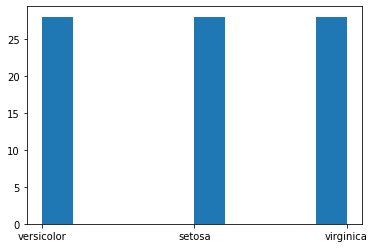

In [150]:
#visualization 1
plt.hist(train.species)

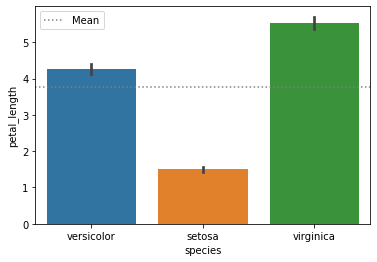

In [134]:
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, 
# adding a horizontal line showing the overall mean of the metric (y-axis).
sns.barplot(x='species', y='petal_length', data=train)
mean_sl = train.petal_length.mean()
plt.axhline(mean_sl, label='Mean', linestyle=':', color='grey')
plt.legend()
plt.show()


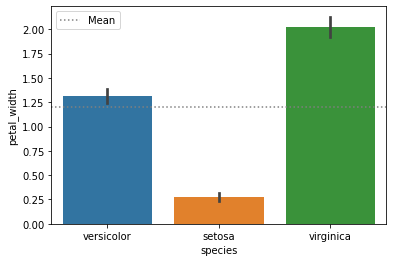

In [130]:
sns.barplot(x='species', y='petal_width', data=train)
mean_sl = train.petal_width.mean()
plt.axhline(mean_sl, label='Mean', linestyle=':', color='grey')
plt.legend()
plt.show()

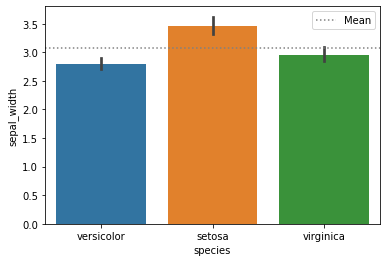

In [132]:
sns.barplot(x='species', y='sepal_width', data=train)
mean_sl = train.sepal_width.mean()
plt.axhline(mean_sl, label='Mean', linestyle=':', color='grey')
plt.legend()
plt.show()

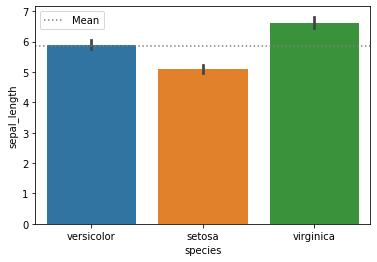

In [133]:
sns.barplot(x='species', y='sepal_length', data=train)
mean_sl = train.sepal_length.mean()
plt.axhline(mean_sl, label='Mean', linestyle=':', color='grey')
plt.legend()
plt.show()

In [135]:
# For each measurement type, compute the descriptive statistics for each species.
train[train.species =='versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,5.896429,2.796429,4.271429,1.314286,1.0,0.0
std,0.425556,0.280848,0.409930,0.199470,0.0,0.0
min,4.900000,2.300000,3.300000,1.000000,1.0,0.0
25%,5.600000,2.600000,4.000000,1.200000,1.0,0.0
50%,5.800000,2.800000,4.250000,1.300000,1.0,0.0
75%,6.125000,3.000000,4.525000,1.500000,1.0,0.0
max,6.900000,3.400000,5.100000,1.800000,1.0,0.0


In [136]:
train[train.species =='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,6.625000,2.960714,5.535714,2.021429,0.0,1.0
std,0.532378,0.318956,0.496815,0.293582,0.0,0.0
min,5.800000,2.200000,4.800000,1.500000,0.0,1.0
25%,6.300000,2.800000,5.100000,1.800000,0.0,1.0
50%,6.450000,3.000000,5.500000,2.000000,0.0,1.0
75%,6.900000,3.100000,5.800000,2.300000,0.0,1.0
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0


In [137]:
train[train.species =='setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.00000,28.0,28.0
mean,5.089286,3.467857,1.507143,0.27500,0.0,0.0
std,0.360390,0.427788,0.184448,0.12057,0.0,0.0
min,4.400000,2.300000,1.200000,0.10000,0.0,0.0
25%,4.875000,3.275000,1.400000,0.20000,0.0,0.0
50%,5.000000,3.400000,1.500000,0.20000,0.0,0.0
75%,5.400000,3.800000,1.600000,0.40000,0.0,0.0
max,5.800000,4.400000,1.900000,0.60000,0.0,0.0


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.


H
0
=
"Virginica petal sizes <= Versicolor petal sizes." 
 
H
1
=
"Virginica petal sizes > Versicolor petal sizes." 



In [142]:
# alpha = .05


# establish variables from train data
# virginica = train, where train's species is virginica
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']


In [143]:
# establish a one-tailed test using a kwarg in mannwhitney for petal width
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(767.0, 3.235595834904965e-10)

In [144]:
# mannwhitney for petal length
t, p = stats.mannwhitneyu(virginica.petal_length, versicolor.petal_length, 
                          alternative="greater")
t, p

(776.5, 1.4739917857575313e-10)

In [145]:
# Sepal Length
t, p = stats.mannwhitneyu(virginica.sepal_length, versicolor.sepal_length, 
                          alternative="greater")
t, p

(676.5, 1.541014598267054e-06)

In [147]:
# Sepal width
t, p = stats.mannwhitneyu(virginica.sepal_width, versicolor.sepal_width, 
                          alternative="greater")
t, p

(510.0, 0.02628629569922847)

### Takeaway
- petal sizes are seemingly distinctive and indicative of species
- low p-values on the Mann-Whitney test show that petals sizes are distinctive

### 4. Multivariate Stats
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col
- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).
- Document takeaways and any actions.

In [189]:
# Getting area of sepal and petal
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']
train.drop(['species_versicolor', 'species_virginica'], axis=1, inplace =True)
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,21.66,0.51


In [190]:
#feature combinations with list of tuples
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]
combos[0]

('sepal_length', 'sepal_width')

In [191]:
#aggregations to examine specific stats
train.groupby('species')['sepal_area'].sum()

species
setosa        497.30
versicolor    463.09
virginica     551.46
Name: sepal_area, dtype: float64

In [192]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

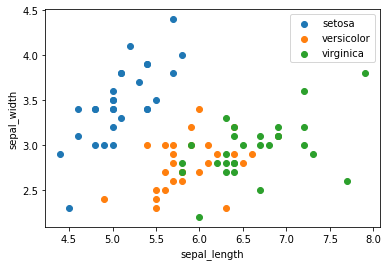

In [193]:
scatter_species(x,y)

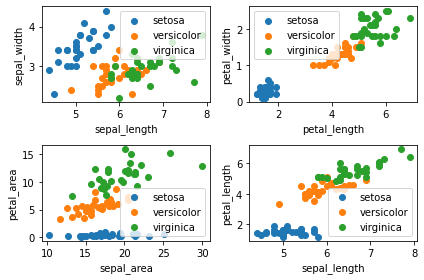

In [194]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

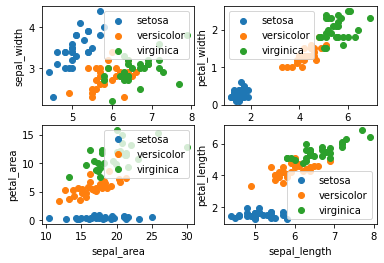

In [177]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

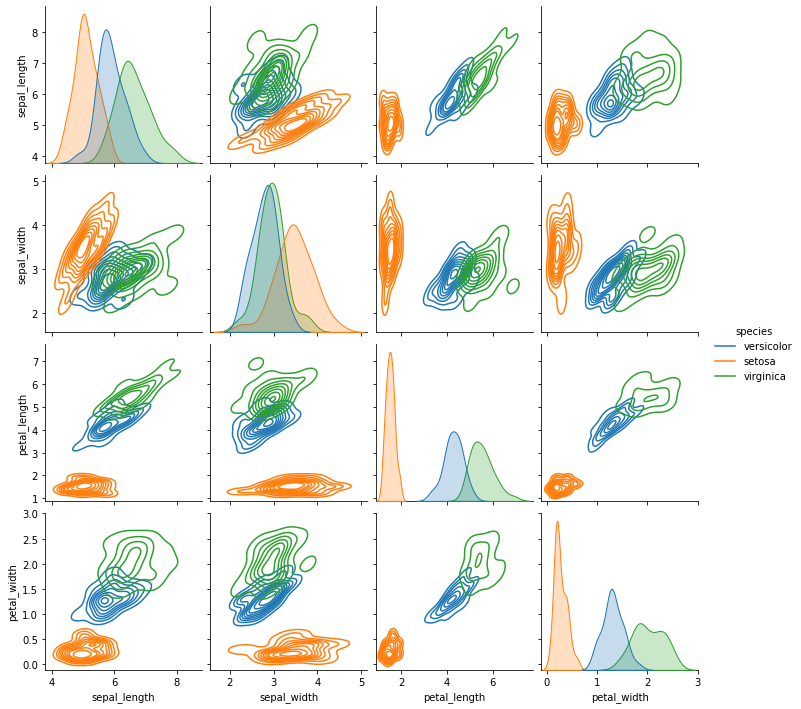

In [162]:
# Pairplot - also trying 'kde'
sns.pairplot(train,vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],hue='species',kind='kde', diag_kind = 'kde')

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [195]:
iris_melt = train.melt(id_vars=['species'], var_name = 'measurments', value_name = 
          'cm')
iris_melt

,species,measurments,cm
0,versicolor,sepal_length,5.70
1,setosa,sepal_length,5.50
2,virginica,sepal_length,6.30
3,versicolor,sepal_length,5.70
4,setosa,sepal_length,5.70
...,...,...,...
499,setosa,petal_area,0.32
500,versicolor,petal_area,7.20
501,versicolor,petal_area,5.85
502,setosa,petal_area,0.76


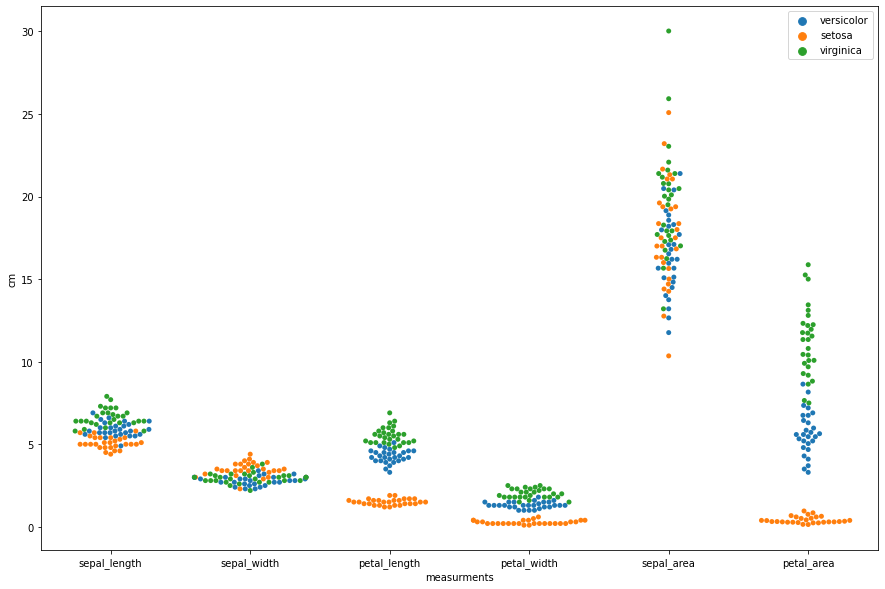

In [196]:
plt.figure(figsize = (15,10))
sns.swarmplot(x = 'measurments', y='cm', data = iris_melt, hue='species')
plt.legend()

### Takeaway
- speal width most difficult to uncluster
- petal length, width, and area can be used to identify setosa.


 ### Next question
    - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [197]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


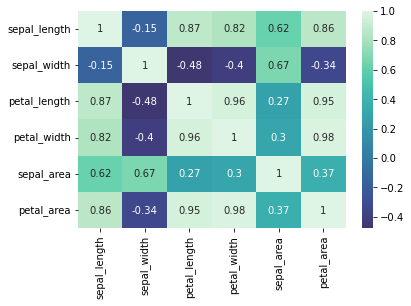

In [198]:
sns.heatmap(train.corr(), cmap='mako', center = 0, annot = True)
plt.show()

### Takeaway
- sepal length/width at -.15  = negative correlations


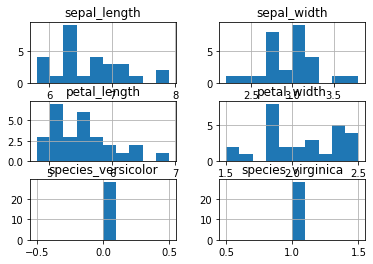

In [199]:
#virginica data
virginica.hist()
plt.show()

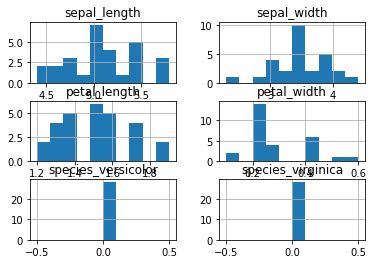

In [204]:
setosa.hist()
plt.show()

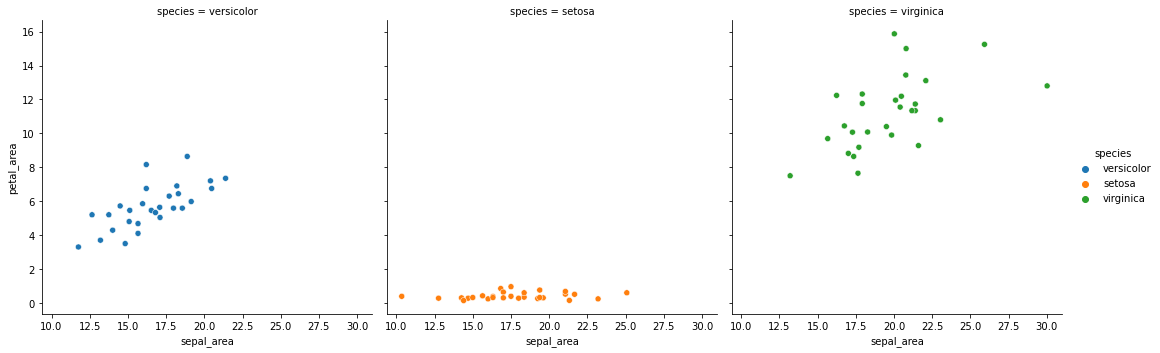

In [202]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')

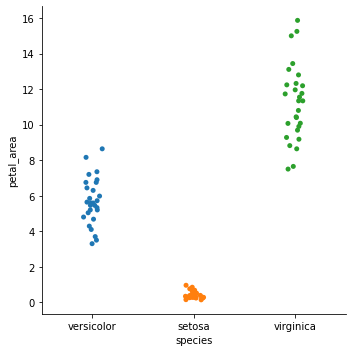

In [203]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')